In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('C:/Users/Renee/Documents/Dev/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
#count the number of missing values in each column
#because there are no missing values, I do not have to immediately drop or fill anything
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#How many heart disease cases do we have in this set?
#138 have heart disease
#165 do not have heart disease
df ['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#break that out by sex
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

# ID Outliers + Remove

In [7]:
df.shape

(303, 14)

In [8]:
##features with wide range: trestbps, chol,thalach
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(df['trestbps'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['trestbps'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['trestbps'])
df.shape

(294, 14)

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(df['chol'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['chol'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['chol'])
df.shape

(289, 14)

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(df['thalach'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['thalach'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['thalach'])
df.shape

(288, 14)

# Generating Plots through PLT and SNS

In [11]:
df['sex'].value_counts()

1    202
0     86
Name: sex, dtype: int64

<BarContainer object of 2 artists>

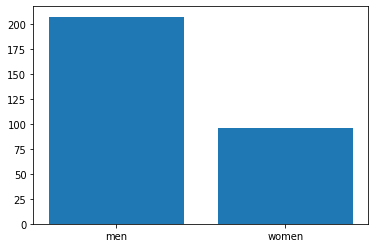

In [12]:
x = ['men', 'women']
y = [207, 96]
plt.bar(x,y)

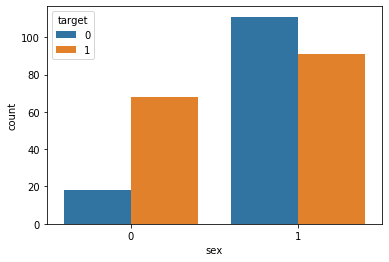

In [13]:
sns.countplot(x="sex", hue="target", data=df)

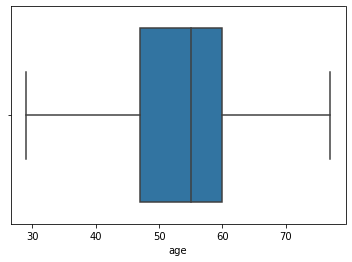

In [14]:
#Box and Whisker - Lines at min and max, third and 4th quartile, and median
#plt.boxplot(df['age'])
#plt.show()
sns.boxplot(df['age'])

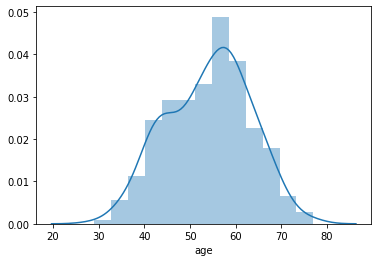

In [15]:
#Histogram/KDE - Look at general shape of distribution
#plt.hist(df['age'])
#plt.show()
sns.distplot(df['age']) #gives probability distribution rather than overall count on y-axis. PLT gives total count.
#KDE plot is a smooth fit to the histogram

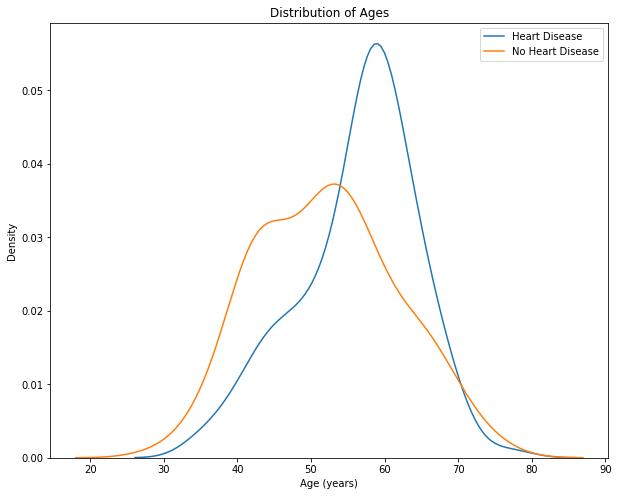

In [16]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

<function matplotlib.pyplot.show(*args, **kw)>

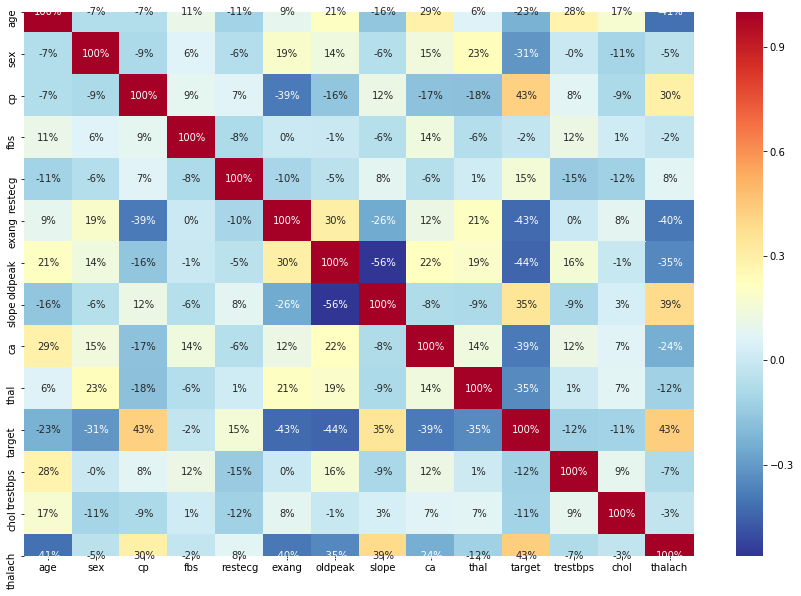

In [17]:
correlations = df.corr()
# df.corr() helps you see what features may have a strong correlation, but difficult to see. Use a heatmap!
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:15].corr(), annot=True, fmt=".0%", cmap = plt.cm.RdYlBu_r) #used colormap cmap to identify clearer correlations
plt.show
#Looks like strong correlations between slope and oldpeak

C:\Users\Renee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Renee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


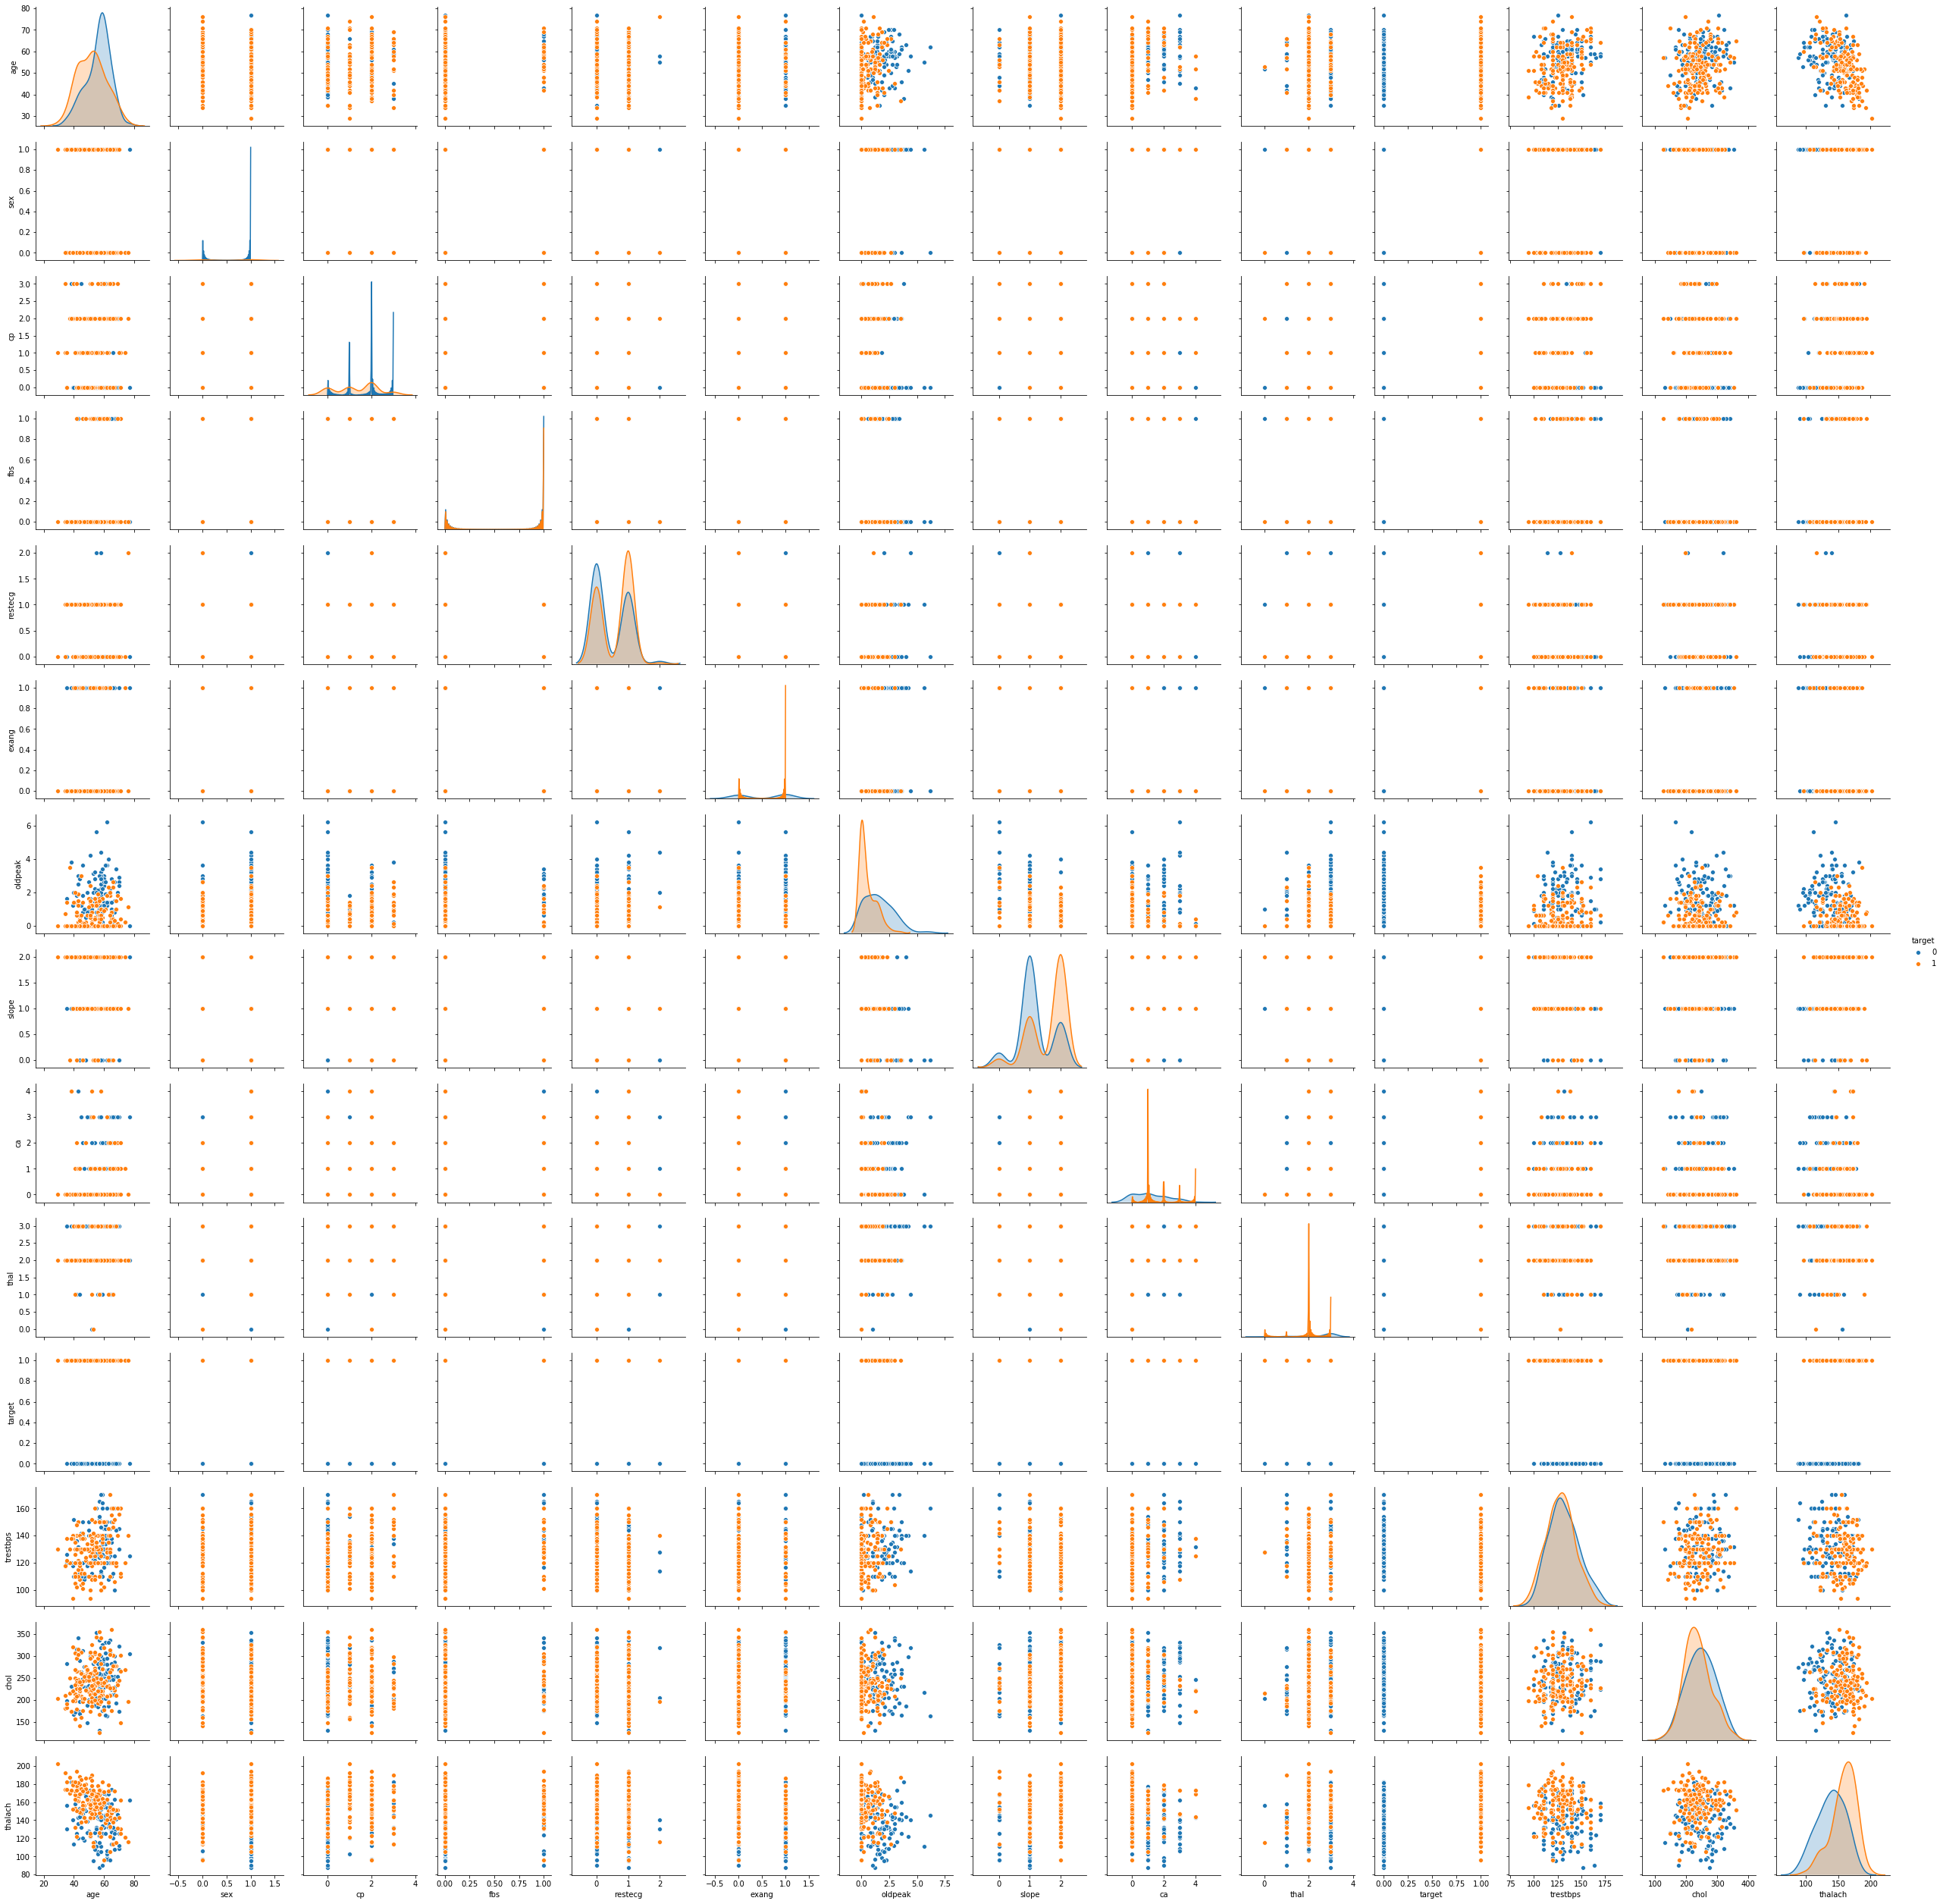

In [18]:
sns.pairplot(df, hue = "target") #shows all pairs

C:\Users\Renee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


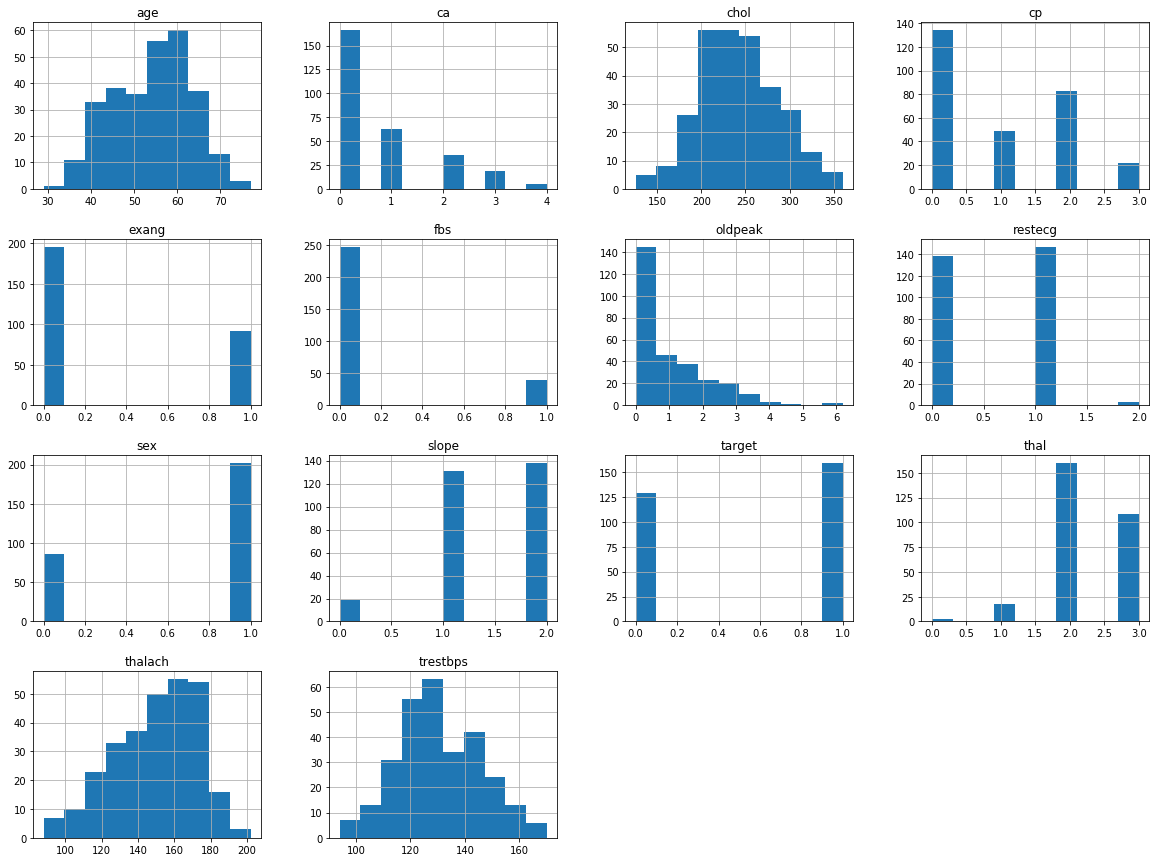

In [19]:
#Look at data spread within each feature
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df.hist(ax=ax)
plt.show()
#age, chol, thalach and trestbps share similar distributions
    #chol = cholesterol
    #thalach = max HR
    #trestbps = resting bp

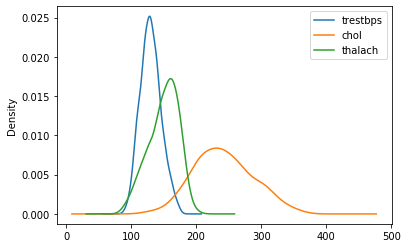

In [20]:
#features with wide range: trestbps, chol,thalach
ax = df.trestbps.plot.kde()
ax = df.chol.plot.kde()
ax = df.thalach.plot.kde()

ax.legend()
plt.show()

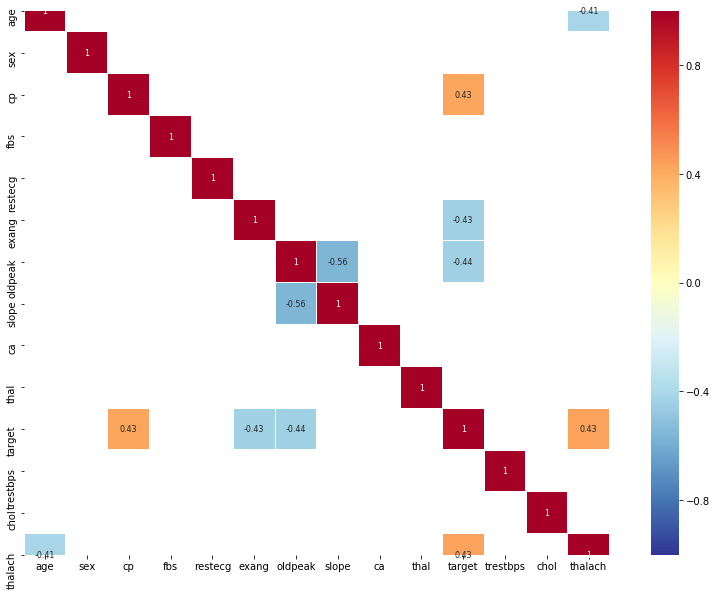

In [21]:
#Look for specific correlations
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],
            cmap = plt.cm.RdYlBu_r, vmax = 1.0, vmin = -1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square = True);

In [22]:
#Largest correlations between the following:
    #oldpeak v. slope (-.56)
         #oldpeak = (ST depression induced by exercise)
         #slope = peak exercise ST
    #exang v. target (-.43)
        #exanng = exercise induced angina
    #oldpeak v. target (-.44)
    #cp v. target (0.43)
        #co = chest pain type
    #thalach v. target (0.43)
        #thalach = max HR achieved

# Exploring High Correlation Features Relative to Age

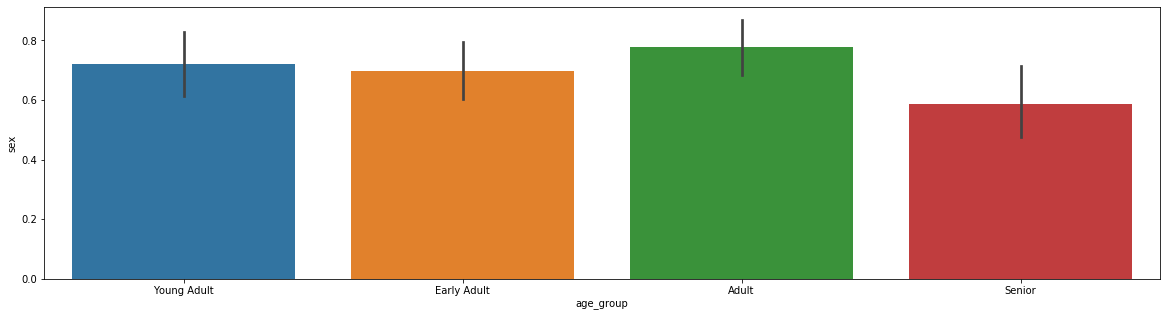

In [23]:
df['age']=df['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)
fig=plt.figure(figsize=(20,5))
sns.barplot(x='age_group',y='sex',data=df)
plt.show()
#Fairly even age distribution within population

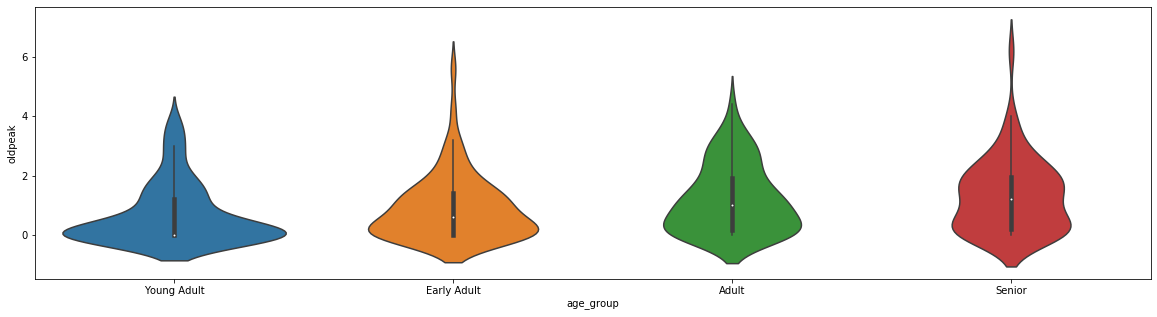

In [24]:
#Use violin plot to help see distribution
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'oldpeak', data = df)
plt.show()
#Young adults typically do not have ST depression induced by exercise. Increases with age.

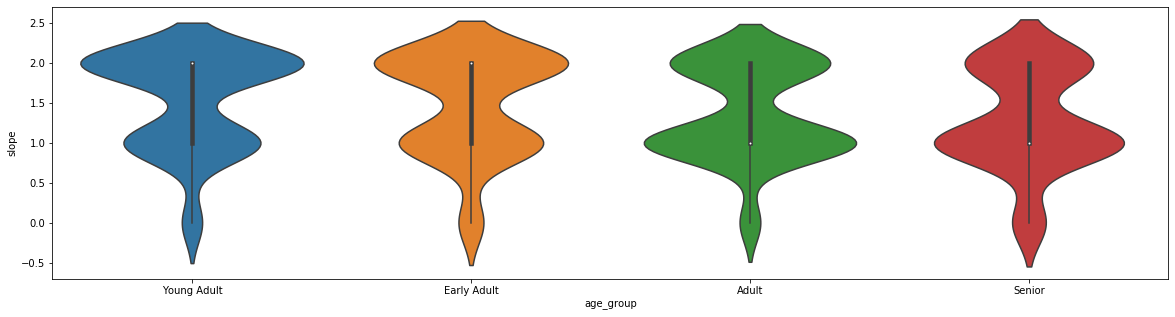

In [25]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'slope', data = df)
plt.show()
#young adult and early adult both have majority 2
#adult and senior have majority 1. Lower peak exercise when older?

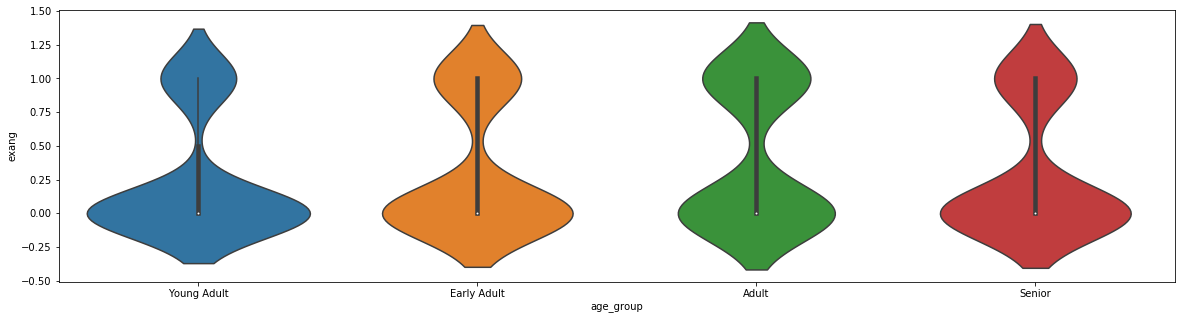

In [26]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'exang', data = df)
plt.show()
#all age ranges have more people who do not have exang (0 = no)

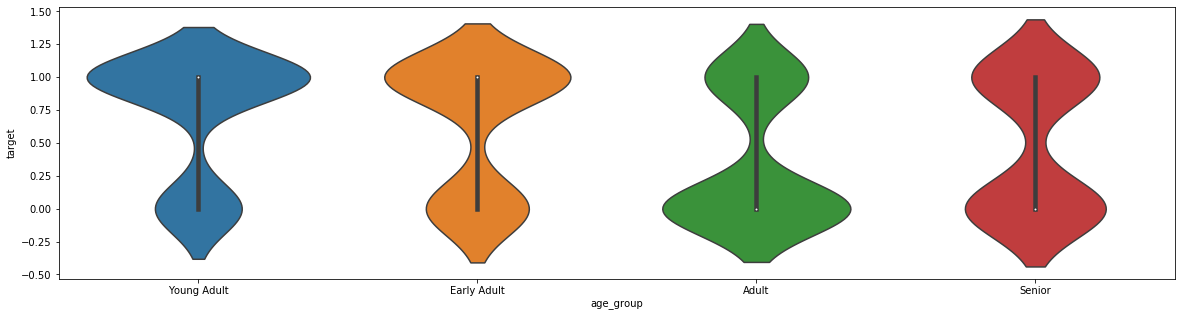

In [27]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'target', data = df)
plt.show()
#young adult has majority no
#adult age range has more highest population with heart disease
#seniors even out

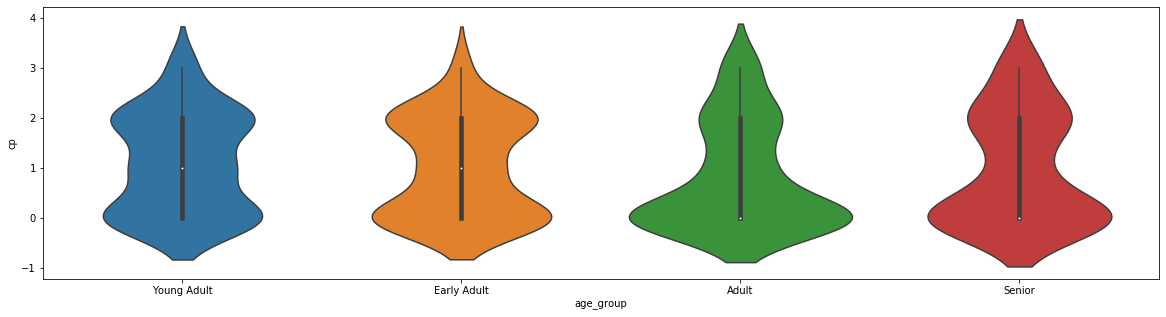

In [28]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'cp', data = df)
plt.show()
#cp type adult and senior majority at 0

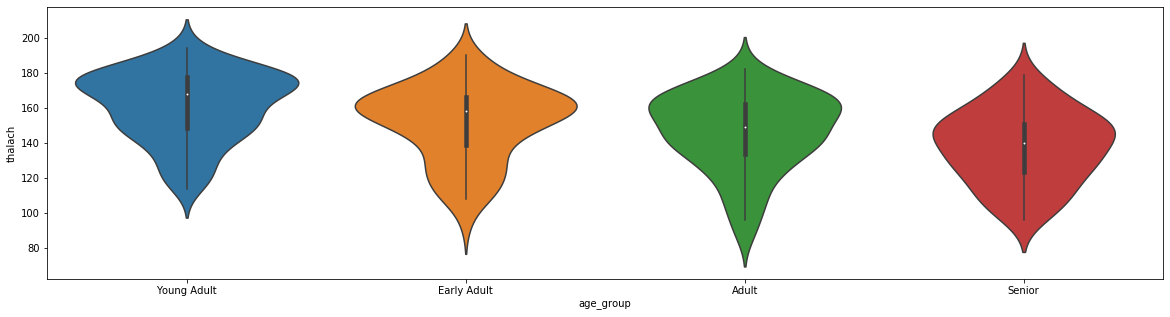

In [29]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'thalach', data = df)
plt.show()
#Later ages' majority at lower HR

In [30]:
#age relevant features
    #thalach
    #cp
    #target
    #slope
    #oldpeak